#### Import Python libraries we need

In [ ]:
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing of data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# For classification
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
pd.__version__

'2.1.4'

In [3]:
import importlib.util
print(importlib.util.find_spec("seaborn") is not None)

True


In [4]:
# Check if TensorFlow is installed
tensorflow_installed = importlib.util.find_spec("tensorflow") is not None
print("TensorFlow installed:", tensorflow_installed)

# Check if Keras is installed
keras_installed = importlib.util.find_spec("keras") is not None
print("Keras installed:", keras_installed)

TensorFlow installed: False
Keras installed: False


In [7]:
tensorflow_installed = importlib.util.find_spec("tensorflow") is not None
print("TensorFlow installed:", tensorflow_installed)

TensorFlow installed: True


In [8]:
# Check if Keras is installed
keras_installed = importlib.util.find_spec("keras") is not None
print("Keras installed:", keras_installed)

Keras installed: True


In [12]:
#read data directly from a folder
file_url = 'cancer_gene_expression.csv'
df = pd.read_csv(file_url)

In [13]:
df

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.000000,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.000000,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.000000,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.000000,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.000000,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,2.933384,0.0,1.683921,0.0,0.0,0.0,0.0,0.635336,1.252839,...,9.985842,9.469967,4.225275,6.955336,11.722206,7.309940,10.986119,6.396848,1.252839,BRCA
797,0.0,0.000000,0.0,2.772625,0.0,0.0,0.0,0.0,0.534759,3.761764,...,12.334681,8.157327,1.482797,6.758183,11.403838,9.005347,11.012045,5.386625,1.697640,COAD
798,0.0,0.408277,0.0,1.854754,0.0,0.0,0.0,0.0,0.000000,0.986520,...,11.671992,8.859616,6.393828,6.427115,11.596586,7.454127,10.718533,5.507417,1.398131,BRCA
799,0.0,0.639232,0.0,3.226971,0.0,0.0,0.0,0.0,1.921322,0.639232,...,12.237087,5.753976,4.192478,6.614875,11.183245,7.544261,10.649382,5.282158,0.639232,BRCA


#### Data manipulation Checking & Cleaning

In [14]:
# Check the number of samples and features
# Note:the last column contain the label of this data set so we can aware of it.
print(df.shape)

(801, 8001)


In [15]:
#let's check some of the columns (first, second)
print(df.columns[0:2])

Index(['gene_1', 'gene_2'], dtype='object')


In [16]:
dataframe[0:3]

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.0,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.0,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.0,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA


In [17]:
df.iloc[:, :2]

,gene_1,gene_2
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000
...,...,...
796,0.0,2.933384
797,0.0,0.000000
798,0.0,0.408277
799,0.0,0.639232


In [18]:
#lets check the name of the last column of this dataframe
df.columns[-1]

'Cancer_Type'

In [19]:
df.iloc[:,-1]

0      KIRC
1      KIRC
2      BRCA
3      KIRC
4      COAD
       ... 
796    BRCA
797    COAD
798    BRCA
799    BRCA
800    COAD
Name: Cancer_Type, Length: 801, dtype: object

In [30]:
#check for missing values

datanul = df.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


In [21]:
print(df['Cancer_Type'].value_counts())

Cancer_Type
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


#### Data preprocesing

In [27]:
## we will now seperate the feature values from the class. we do this because scikit-learn 
## requires that features and class are separated before parsing them to the classifiers.
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [28]:
# Encoding will be done using the LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y)
y = label_encoder.transform(y)
labels = label_encoder.classes_
classes = np.unique(y)
nclasses = np.unique(y).shape[0]

In [29]:
# Split the data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Split the training set into two (training and validation)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

In [31]:
### scale the data between 0-1
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_val = min_max_scaler.fit_transform(X_val)
X_test = min_max_scaler.fit_transform(X_test)

### Neural Network Model

This is a classification model built using a feedforward neural network (FNN) (also called a multi-layer perceptron, MLP). It takes in input data (features) and predicts one of multiple classes (since it uses softmax in the output layer).

In [32]:
# 1.Define model
model = Sequential()
# Sequential() means we are stacking layers one after another in a simple, linear order.

# 2. hidden layer 1
model.add(Dense(40, input_dim=X_train.shape[1], activation='relu'))
#Dense(40): This layer has 40 neurons (processing units).
#input_dim=X_train.shape[1]: The model expects input data with a number of features equal to the number of columns in X_train.
#activation='relu': Uses the ReLU (Rectified Linear Unit) activation function, which helps the model learn complex patterns.

# 3. hidden layer 2
model.add(Dense(20, activation='relu'))
# Another hidden layer with 20 neurons.
# Uses ReLU activation, which helps the model handle non-linearity.


# 4. output layer
model.add(Dense(nclasses, activation='softmax'))
# Dense(nclasses): This layer has as many neurons as the number of classes in the dataset (nclasses).
# activation='softmax': Converts the outputs into probabilities for each class. 
# The class with the highest probability is the predicted class.


# 5. define optimizer and learning rate. We will use Adam optimizer
opt_adam = keras.optimizers.Adam(learning_rate=0.001)
# Adam optimizer is used to adjust the weights and improve learning.
# Learning rate = 0.001: Controls how much the model updates its weights in each step.

# 6. Compile the Model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=opt_adam, metrics=[keras.metrics.SparseCategoricalAccuracy()])
## loss=tf.keras.losses.SparseCategoricalCrossentropy():
## This is the loss function, which measures how well the model is performing.
## It's used for multi-class classification when class labels are integers (not one-hot encoded).
## optimizer=opt_adam: Uses the Adam optimizer for efficient learning.
## metrics=[SparseCategoricalAccuracy()]: Tracks the accuracy of the model during training.

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
#fit the model to the training data
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32,epochs=200, verbose=1)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.1252 - sparse_categorical_accuracy: 0.3219 - val_loss: 1.3913 - val_sparse_categorical_accuracy: 0.4375
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4310 - sparse_categorical_accuracy: 0.4173 - val_loss: 1.2372 - val_sparse_categorical_accuracy: 0.5547
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2724 - sparse_categorical_accuracy: 0.4995 - val_loss: 1.0187 - val_sparse_categorical_accuracy: 0.7109
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0807 - sparse_categorical_accuracy: 0.6327 - val_loss: 0.8746 - val_sparse_categorical_accuracy: 0.6641
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9149 - sparse_categorical_accuracy: 0.6524 - val_loss: 0.7580 - val_sparse_categorical_accuracy: 0.6953
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7606 - sparse_categorical_accuracy: 0.7238 - val_loss: 0.5749 - val_sparse_categorical_accuracy: 0.8594
Epoch 7/2

In [34]:
predictions = model.predict(X_test)
_, accuracy = model.evaluate(X_test, y_test, verbose=0)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [36]:
# Get the predictions for the first 20 samples in the test set
for index,entry in enumerate(predictions[0:20,:]):
    print('predicted:%d ,actual:%d'%(np.argmax(entry),y_test[index]))

predicted:2 ,actual:2
predicted:4 ,actual:4
predicted:1 ,actual:1
predicted:1 ,actual:1
predicted:3 ,actual:3
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:4 ,actual:4
predicted:4 ,actual:4
predicted:3 ,actual:3
predicted:3 ,actual:3
predicted:1 ,actual:1
predicted:0 ,actual:0
predicted:4 ,actual:4
predicted:2 ,actual:2
predicted:0 ,actual:0
predicted:4 ,actual:4
predicted:4 ,actual:4
predicted:2 ,actual:2
predicted:4 ,actual:4


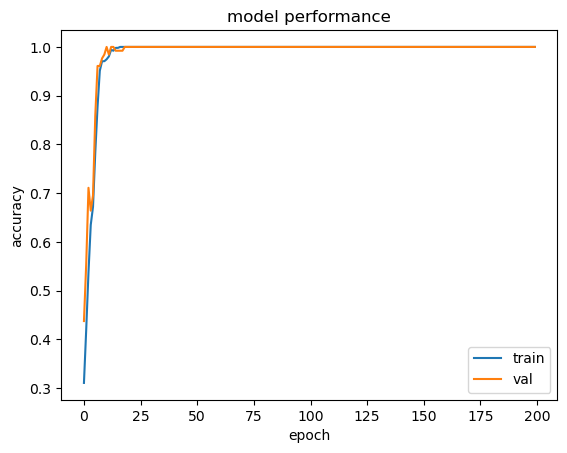

In [37]:
# Summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

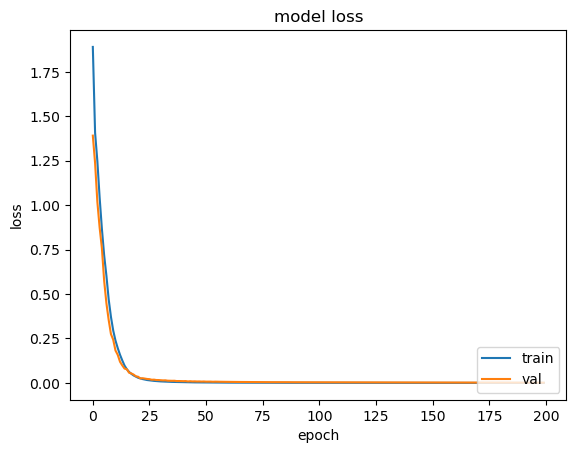

In [38]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()